# **Setup Dependencies**

```
Muhamad Alfarisy (23223056)

Matematika Lanjut (2023)
Dosen pengampu : Dr. Fadhil Hidayat, S.Kom., M.T.
```


In [1]:
# Import Libraries for association rule mininig to find frequent patterns
import pandas as pd

# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re
import networkx as nx


In [2]:
# mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data loading**

```
- read data from csv
- preview data
```


In [3]:
# parsing csv file
df = pd.read_csv("/content/drive/MyDrive/Kuliah - LTI/Semester 1/Matlan/uas/23223056_uas_matlan/Retail_Transactions_Dataset.csv")

# 5 - samples viwes
df.head(5)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,None
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          30000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB


In [5]:
df.describe()

,Transaction_ID,Total_Items,Total_Cost
count,3.000000e+04,30000.000000,30000.000000
mean,1.000015e+09,5.497800,52.504527
std,8.660398e+03,2.873686,27.363732
min,1.000000e+09,1.000000,5.000000
25%,1.000007e+09,3.000000,28.687500
50%,1.000015e+09,5.000000,52.480000
75%,1.000022e+09,8.000000,76.100000
max,1.000030e+09,10.000000,99.990000


In [6]:
df['Product']

0                                             ['Hair Gel']
1               ['Tuna', 'Bread', 'Tissues', 'Trash Bags']
2                               ['Jam', 'Soap', 'Ketchup']
3                                            ['BBQ Sauce']
4        ['Hand Sanitizer', 'Bread', 'Extension Cords',...
                               ...                        
29995    ['Butter', 'Tuna', 'Vinegar', 'Shower Gel', 'O...
29996                                            ['Honey']
29997                      ['Ironing Board', 'Toothbrush']
29998                              ['Broom', 'Lawn Mower']
29999                 ['Hair Gel', 'Mop', 'Peanut Butter']
Name: Product, Length: 30000, dtype: object

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

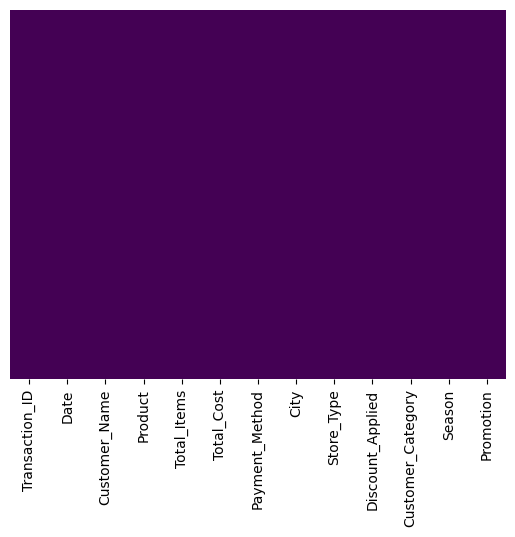

In [7]:
# check null data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

df.isnull().sum()

In [8]:
# unique customer
df['Customer_Name'].nunique()

25725

In [9]:
# unique product
df['Product'].nunique()

21967

# **Exploratory Data Analysis** **(EDA) & Visualization**

```
- Analyze data from visualization
- plot graphs
```

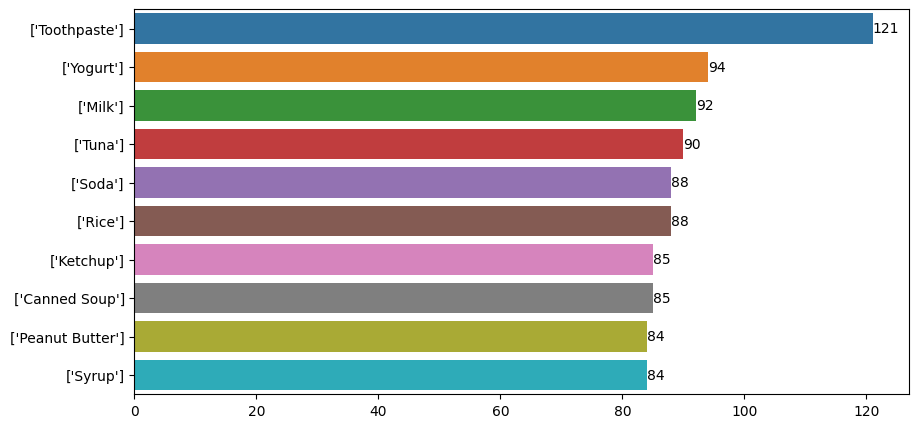

In [10]:
# Top 10 transactions
plt.figure(figsize=(10,5))
top_10_products = df['Product'].value_counts().nlargest(10)
ax = sns.barplot(y=top_10_products.index,x=top_10_products.values)
for bars in ax.containers:
    ax.bar_label(bars)

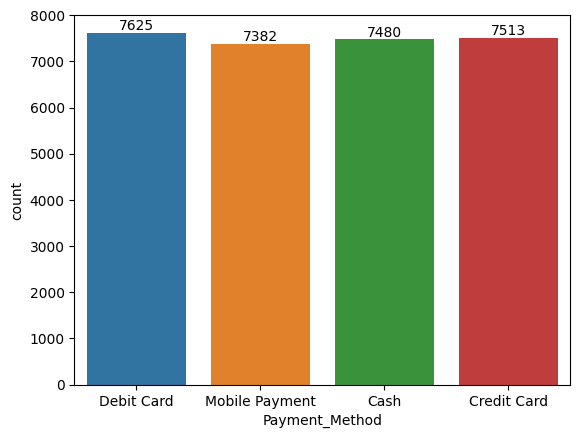

In [11]:
# Payment method
ax = sns.countplot(data=df,x='Payment_Method')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Total_Items', ylabel='Product'>

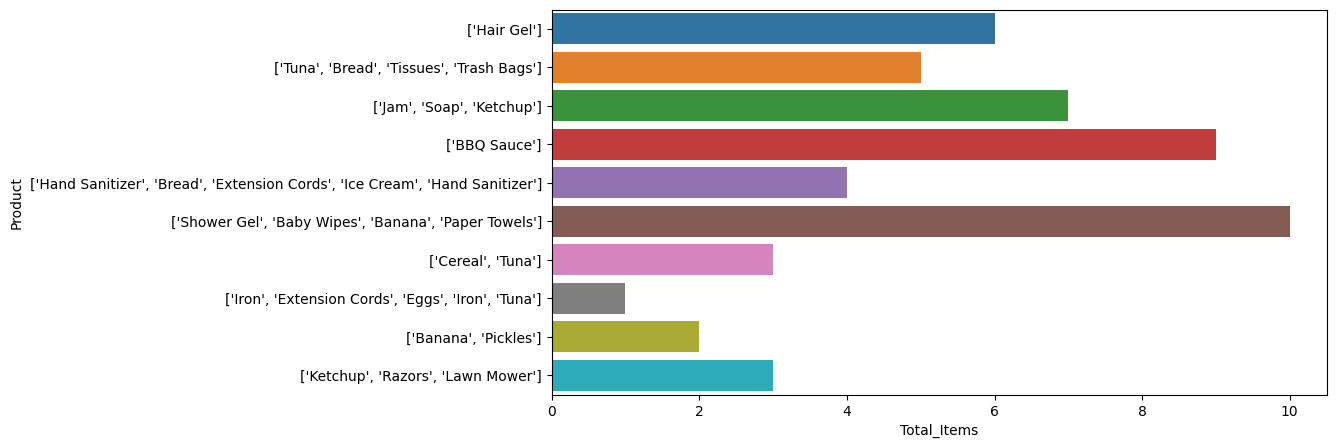

In [12]:
# Top - total_item sold
plt.figure(figsize=(10,5))
sns.barplot(data=df, y=df['Product'].head(10),x=df['Total_Items'])

<Axes: xlabel='Total_Cost', ylabel='Product'>

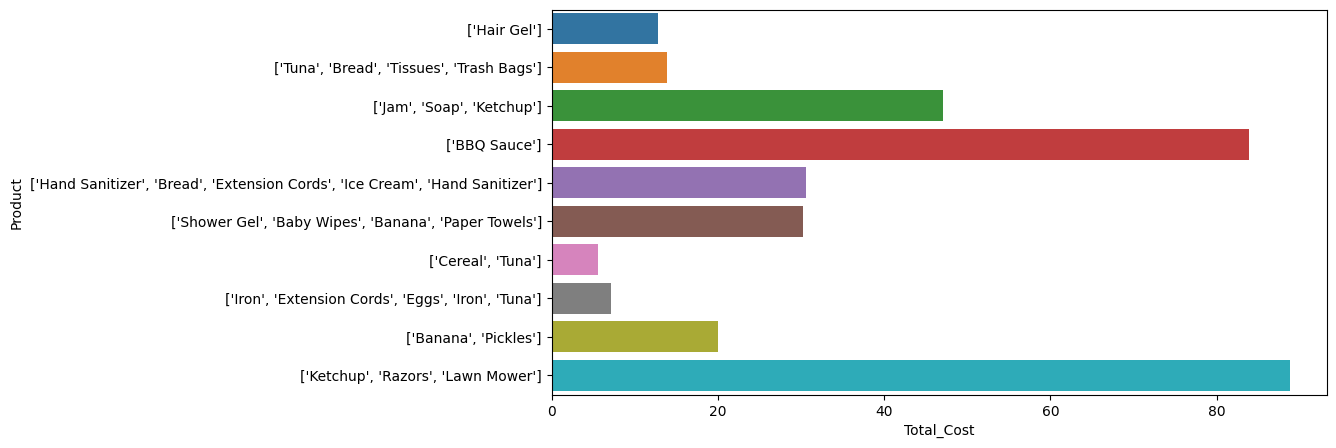

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, y=df['Product'].head(10),x=df['Total_Cost'])

([<matplotlib.patches.Wedge at 0x7ead2439dd20>,
 [Text(1.0093470105305007, 0.4372855043711621, 'Student'),
  Text(0.3827813986819145, 1.031250891307793, 'Homemaker'),
  Text(-0.466688880187556, 0.9960931126703393, 'Teenager'),
  Text(-1.0353973675281767, 0.37141929313879446, 'Middle-Aged'),
  Text(-0.9951625884081197, -0.4686698439550506, 'Retiree'),
  Text(-0.3780257053100057, -1.0330036622030305, 'Senior Citizen'),
  Text(0.45140557602533155, -1.003111661747205, 'Young Adult'),
  Text(1.0211346400710393, -0.40900372473486, 'Professional')],
 [Text(0.5505529148348185, 0.23851936602063384, '13.0%'),
  Text(0.2087898538264988, 0.562500486167887, '12.7%'),
  Text(-0.25455757101139415, 0.5433235160020031, '12.6%'),
  Text(-0.5647622004699145, 0.2025923417120697, '12.5%'),
  Text(-0.5428159573135197, -0.2556380967027549, '12.5%'),
  Text(-0.20619583926000307, -0.5634565430198348, '12.3%'),
  Text(0.24622122328654444, -0.5471518154984754, '12.3%'),
  Text(0.5569825309478396, -0.223092940764

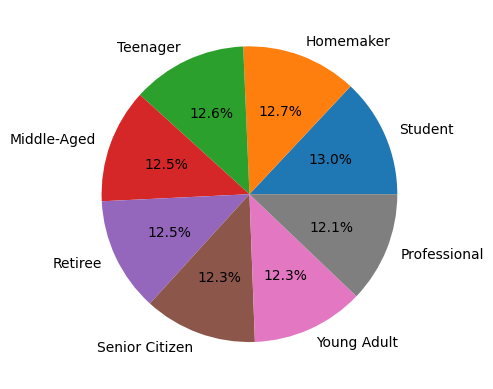

In [14]:
# customer type
customer_category=df["Customer_Category"].value_counts()
plt.pie(customer_category,labels=customer_category.index,autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7eacec3cfe80>,
 [Text(0.9492116385012817, 0.5558752246086459, 'Specialty Store'),
  Text(-0.017277981078362734, 1.0998642967974985, 'Warehouse Club'),
  Text(-0.9621560806750076, 0.5331563339397821, 'Convenience Store'),
  Text(-0.9449345918906388, -0.5631151010659119, 'Supermarket'),
  Text(0.009906213653583622, -1.099955393155127, 'Pharmacy'),
  Text(0.9544083379125182, -0.5469046759016278, 'Department Store')],
 [Text(0.5177518028188808, 0.30320466796835227, '16.9%'),
  Text(-0.00942435331547058, 0.5999259800713628, '16.8%'),
  Text(-0.5248124076409132, 0.29081254578533566, '16.6%'),
  Text(-0.5154188683039848, -0.30715369149049737, '16.6%'),
  Text(0.005403389265591065, -0.5999756689937055, '16.6%'),
  Text(0.5205863661341008, -0.2983116414008879, '16.6%')])

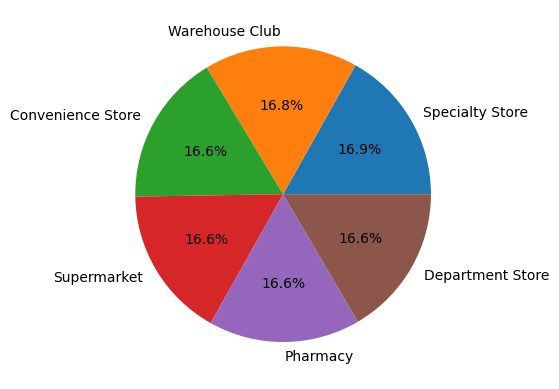

In [15]:
# store type
store_type=df["Store_Type"].value_counts()
plt.pie(store_type,labels=store_type.index,autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7eacec454d30>,
 [Text(-0.005298785823954407, 1.0999872375935968, 'False'),
  Text(0.005298785823953784, -1.0999872375935968, 'True')],
 [Text(-0.00289024681306604, 0.5999930386874164, '50.2%'),
  Text(0.0028902468130657, -0.5999930386874164, '49.8%')])

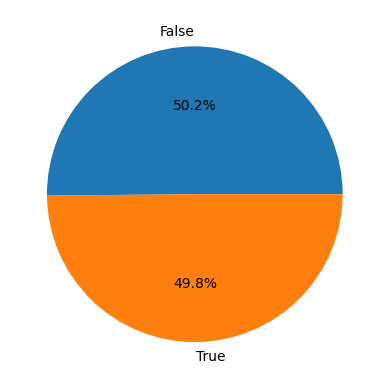

In [16]:
# Discount_Applied
is_discount=df["Discount_Applied"].value_counts()
plt.pie(is_discount,labels=is_discount.index,autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7eacec48f4f0>,
 [Text(1.041992843674274, 0.3524924307436972, 'Los Angeles'),
  Text(0.6229519329751664, 0.9066040421278211, 'Boston'),
  Text(-0.031788463151189654, 1.0995405829756744, 'New York'),
  Text(-0.6717375064231766, 0.8710733163542395, 'Seattle'),
  Text(-1.0549630485594763, 0.3115332505112354, 'Houston'),
  Text(-1.037519439402724, -0.3654496037232187, 'Dallas'),
  Text(-0.6276903985993754, -0.9033298198920245, 'Chicago'),
  Text(0.019120775987901267, -1.0998338037747433, 'San Francisco'),
  Text(0.6572336414600355, -0.8820679908789241, 'Atlanta'),
  Text(1.0476119330071354, -0.3354239672728433, 'Miami')],
 [Text(0.5683597329132403, 0.19226859858747117, '10.4%'),
  Text(0.33979196344099977, 0.49451129570608415, '10.1%'),
  Text(-0.017339161718830716, 0.5997494088958223, '10.0%'),
  Text(-0.36640227623082355, 0.4751308998295851, '10.0%'),
  Text(-0.5754343901233506, 0.16992722755158296, '10.0%'),
  Text(-0.5659196942196676, -0.199336147485392,

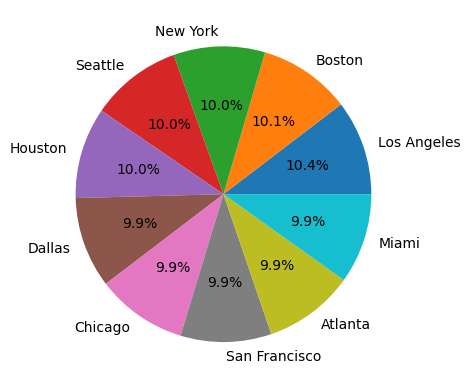

In [17]:
# City
is_discount=df["City"].value_counts()
plt.pie(is_discount,labels=is_discount.index,autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7eacec31dea0>,
 [Text(0.7725050654647551, 0.7830938154725109, 'Spring'),
  Text(-0.7932981129880472, 0.762022377577984, 'Summer'),
  Text(-0.7567721940697819, -0.7983081148797175, 'Fall'),
  Text(0.7881731606121575, -0.7673220112121393, 'Winter')],
 [Text(0.4213663993444118, 0.42714208116682406, '25.2%'),
  Text(-0.43270806162984393, 0.4156485695879912, '25.2%'),
  Text(-0.4127848331289719, -0.43544078993439134, '25.0%'),
  Text(0.4299126330611768, -0.41853927884298503, '24.6%')])

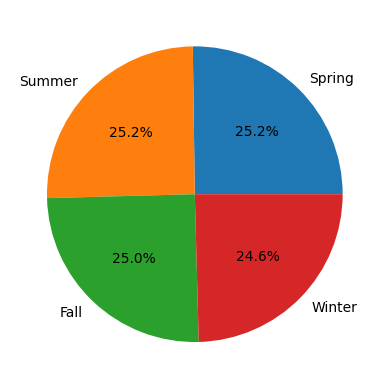

In [18]:
# Season
is_discount=df["Season"].value_counts()
plt.pie(is_discount,labels=is_discount.index,autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7eacec381d80>,
 [Text(0.7675695156620523, 0.7879321281851137, 'Debit Card'),
  Text(-0.7989418373771799, 0.7561031282096219, 'Credit Card'),
  Text(-0.7566885898748921, -0.7983873608425597, 'Cash'),
  Text(0.7873692132065149, -0.768146940431682, 'Mobile Payment')],
 [Text(0.41867428127021034, 0.4297811608282438, '25.4%'),
  Text(-0.435786456751189, 0.4124198881143392, '25.0%'),
  Text(-0.4127392308408502, -0.4354840150050325, '24.9%'),
  Text(0.4294741162944626, -0.41898924023546286, '24.6%')])

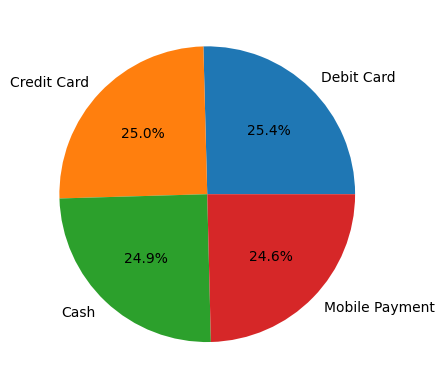

In [19]:
# PaymentMethod
is_discount=df["Payment_Method"].value_counts()
plt.pie(is_discount,labels=is_discount.index,autopct="%1.1f%%")

In [20]:
df.Date=pd.to_datetime(df.Date)

year=[]
month=[]
for i in df.Date:
  year.append(i.strftime("%Y"))
  month.append(i.strftime("%m"))

In [21]:
df.drop("Date",axis=1,inplace=True)

df["year"]=year
df['month']=month
df['year']=df['year'].astype('int')
df.month=df['month'].astype('int')


In [22]:
year1=list(df.groupby("year"))[0][1]
year2=list(df.groupby("year"))[1][1]
year3=list(df.groupby("year"))[2][1]
year4=list(df.groupby("year"))[3][1]

In [23]:
year1cost=[]
year2cost=[]
year3cost=[]
year4cost=[]

for i in range(1,13):
  st='month == {}'.format(i)
  year1cost.append(year1.query(st).Total_Cost.sum())
  year2cost.append(year2.query(st).Total_Cost.sum())
  year3cost.append(year3.query(st).Total_Cost.sum())
  year4cost.append(year4.query(st).Total_Cost.sum())

In [24]:
import calendar
months=list(calendar.month_name)[1:]

<ipython-input-25-f54a42c11263>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(),rotation=20)


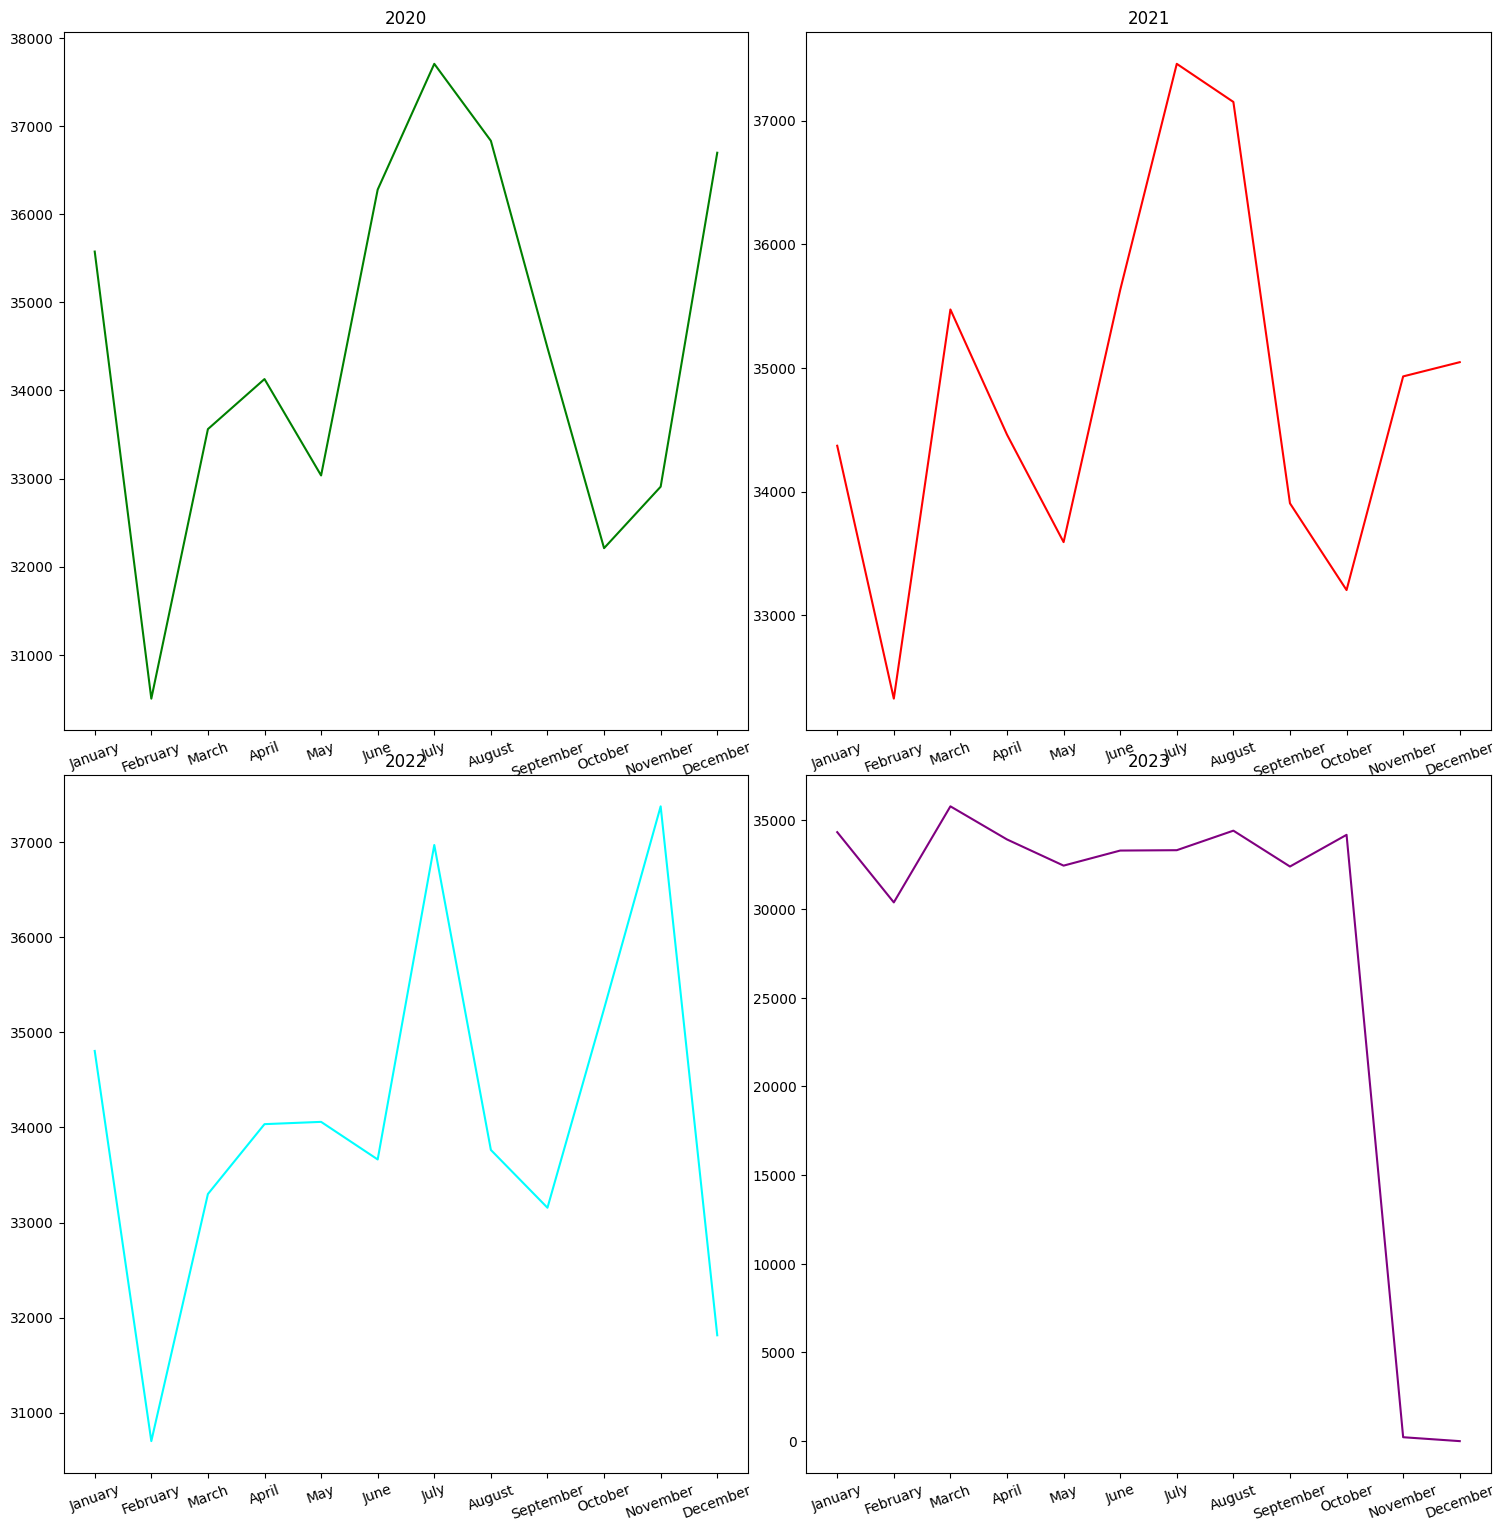

In [25]:
# Grafik penjualan di periode tertentu

fig,axes=plt.subplots(2,2,figsize=(15,15))
plt.tight_layout()
sns.lineplot(x=months,y=year1cost,ax=axes[0][0],color='green')
sns.lineplot(x=months,y=year2cost,ax=axes[0][1],color='red')
sns.lineplot(x=months,y=year3cost,ax=axes[1][0],color='cyan')
sns.lineplot(x=months,y=year4cost,ax=axes[1][1],color='purple')
title=["2020","2021","2022","2023"]
count=0
for i in range(2):
  for j in range(2):
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(),rotation=20)
    axes[i][j].set_title(title[count])
    count+=1

**Analisis** :



*   dapat dilihat disini bahwa, penjualan di periode tahun 2023 akhir tahun mengalami penurunan.
*   untuk persebaran data attribute seperti `payment_method` , `store_type` ,dll tersebar secara merata (balanced).


# **Data Cleaning & Processing**

```
- Removes duplicated data
- Processing data
```


In [26]:
# example: duplicate value of product
df['Product'][3864]

"['Yogurt', 'Vinegar', 'Vinegar', 'Toothpaste']"

In [27]:
# remove [] mark
df['Product'] = df['Product'].str.strip("[]")

In [28]:
# check if there is any duplicate
boolean = df['Product'].duplicated().any()
boolean

True

In [29]:
# check duplicates
df.pivot_table(index=['Product'], aggfunc='size')

Product
'Air Freshener'                                             72
'Air Freshener', 'Air Freshener', 'Mop', 'Deodorant'         1
'Air Freshener', 'Air Freshener', 'Salmon'                   1
'Air Freshener', 'Air Freshener', 'Spinach'                  1
'Air Freshener', 'Apple'                                     1
                                                            ..
'Yogurt', 'Vinegar', 'Vinegar', 'Toothpaste'                 1
'Yogurt', 'Water', 'Cleaning Rags'                           1
'Yogurt', 'Yogurt', 'Butter', 'Ironing Board'                1
'Yogurt', 'Yogurt', 'Razors', 'Mop', 'Laundry Detergent'     1
'Yogurt', 'Yogurt', 'Syrup', 'Salmon'                        1
Length: 21967, dtype: int64

In [30]:
# split string by delimeter , into array
df['Product'] = df['Product'].str.split(',')

In [31]:
# filter product has more than 1 itemset
min_num_of_itemset = 2

df = df[df['Product'].apply(lambda x: len(x)) > min_num_of_itemset - 1]
df.head(5)

,Transaction_ID,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,year,month
1,1000000001,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,7
2,1000000002,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None,2021,10
4,1000000004,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None,2021,10
5,1000000005,Elizabeth Cook,"['Shower Gel', 'Baby Wipes', 'Banana', 'Pap...",10,30.19,Debit Card,Atlanta,Supermarket,True,Teenager,Summer,None,2021,4
6,1000000006,Kara Bradley,"['Cereal', 'Tuna']",3,5.57,Mobile Payment,Boston,Warehouse Club,True,Student,Winter,Discount on Selected Items,2023,10


In [32]:
# Convert list (products) into multiple rows
df_exploded = df.explode('Product')
df_exploded.head(10)

,Transaction_ID,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,year,month
1,1000000001,Emily Fitzgerald,'Tuna',5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,7
1,1000000001,Emily Fitzgerald,'Bread',5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,7
1,1000000001,Emily Fitzgerald,'Tissues',5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,7
1,1000000001,Emily Fitzgerald,'Trash Bags',5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,7
2,1000000002,Michael Webb,'Jam',7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None,2021,10
2,1000000002,Michael Webb,'Soap',7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None,2021,10
2,1000000002,Michael Webb,'Ketchup',7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None,2021,10
4,1000000004,Cathy Hernandez,'Hand Sanitizer',4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None,2021,10
4,1000000004,Cathy Hernandez,'Bread',4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None,2021,10
4,1000000004,Cathy Hernandez,'Extension Cords',4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None,2021,10


In [33]:
# check previous duplicate data
df_exploded['Product'][3864]

3864         'Yogurt'
3864        'Vinegar'
3864        'Vinegar'
3864     'Toothpaste'
Name: Product, dtype: object

In [34]:
# remove duplication
df_exploded= df_exploded.drop_duplicates()

In [35]:
# check if it's still duplicate?
df_exploded['Product'][3864]

3864         'Yogurt'
3864        'Vinegar'
3864     'Toothpaste'
Name: Product, dtype: object

In [36]:
df_exploded

,Transaction_ID,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,year,month
1,1000000001,Emily Fitzgerald,'Tuna',5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,7
1,1000000001,Emily Fitzgerald,'Bread',5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,7
1,1000000001,Emily Fitzgerald,'Tissues',5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,7
1,1000000001,Emily Fitzgerald,'Trash Bags',5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One),2020,7
2,1000000002,Michael Webb,'Jam',7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None,2021,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,1000029998,Jeremy Foster,'Broom',7,65.67,Mobile Payment,Seattle,Department Store,True,Retiree,Summer,BOGO (Buy One Get One),2020,2
29998,1000029998,Jeremy Foster,'Lawn Mower',7,65.67,Mobile Payment,Seattle,Department Store,True,Retiree,Summer,BOGO (Buy One Get One),2020,2
29999,1000029999,Devin Lawrence,'Hair Gel',9,12.04,Debit Card,Seattle,Specialty Store,False,Homemaker,Summer,None,2020,11
29999,1000029999,Devin Lawrence,'Mop',9,12.04,Debit Card,Seattle,Specialty Store,False,Homemaker,Summer,None,2020,11


In [37]:
# filter data by City
def filter_bycity(dframe,city):
  return dframe[(dframe.City == city)]

In [38]:
# filter data by customer
def filter_bycustomer(dframe,customer_name):
  return dframe[(dframe.Customer_Name == customer_name)]

In [39]:
# filter data by customer category
def filter_bycustomer_category(dframe, customer_category):
  return dframe[(dframe.Customer_Category == customer_category)]

In [40]:
# dataframe filter by city
dfCity = filter_bycity(df_exploded,"New York")
dfCity

,Transaction_ID,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,year,month
14,1000000014,Christopher Barnett,'Lawn Mower',8,15.67,Credit Card,New York,Warehouse Club,False,Senior Citizen,Fall,None,2023,2
14,1000000014,Christopher Barnett,'Tea',8,15.67,Credit Card,New York,Warehouse Club,False,Senior Citizen,Fall,None,2023,2
25,1000000025,Jonathan Cross,'Extension Cords',10,71.56,Credit Card,New York,Supermarket,False,Professional,Summer,Discount on Selected Items,2023,2
25,1000000025,Jonathan Cross,'Orange',10,71.56,Credit Card,New York,Supermarket,False,Professional,Summer,Discount on Selected Items,2023,2
26,1000000026,Michael Powers,'Pasta',6,75.45,Mobile Payment,New York,Warehouse Club,True,Senior Citizen,Fall,Discount on Selected Items,2020,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1000029995,Candice Wilson,'Butter',7,31.74,Debit Card,New York,Supermarket,True,Professional,Spring,Discount on Selected Items,2023,10
29995,1000029995,Candice Wilson,'Tuna',7,31.74,Debit Card,New York,Supermarket,True,Professional,Spring,Discount on Selected Items,2023,10
29995,1000029995,Candice Wilson,'Vinegar',7,31.74,Debit Card,New York,Supermarket,True,Professional,Spring,Discount on Selected Items,2023,10
29995,1000029995,Candice Wilson,'Shower Gel',7,31.74,Debit Card,New York,Supermarket,True,Professional,Spring,Discount on Selected Items,2023,10


In [41]:
# dataframe filter by  customer category
dfCustomerCategory = filter_bycustomer_category(df_exploded, "Student")
dfCustomerCategory

,Transaction_ID,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,year,month
6,1000000006,Kara Bradley,'Cereal',3,5.57,Mobile Payment,Boston,Warehouse Club,True,Student,Winter,Discount on Selected Items,2023,10
6,1000000006,Kara Bradley,'Tuna',3,5.57,Mobile Payment,Boston,Warehouse Club,True,Student,Winter,Discount on Selected Items,2023,10
7,1000000007,Carla Hernandez,'Iron',1,7.15,Debit Card,Dallas,Warehouse Club,False,Student,Fall,BOGO (Buy One Get One),2022,3
7,1000000007,Carla Hernandez,'Extension Cords',1,7.15,Debit Card,Dallas,Warehouse Club,False,Student,Fall,BOGO (Buy One Get One),2022,3
7,1000000007,Carla Hernandez,'Eggs',1,7.15,Debit Card,Dallas,Warehouse Club,False,Student,Fall,BOGO (Buy One Get One),2022,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29981,1000029981,Craig Davis,'Bread',7,80.27,Debit Card,Seattle,Department Store,True,Student,Summer,BOGO (Buy One Get One),2021,8
29984,1000029984,Kristin Wright,'Vinegar',7,73.66,Mobile Payment,Atlanta,Warehouse Club,True,Student,Summer,Discount on Selected Items,2023,7
29984,1000029984,Kristin Wright,'Plant Fertilizer',7,73.66,Mobile Payment,Atlanta,Warehouse Club,True,Student,Summer,Discount on Selected Items,2023,7
29984,1000029984,Kristin Wright,'Laundry Detergent',7,73.66,Mobile Payment,Atlanta,Warehouse Club,True,Student,Summer,Discount on Selected Items,2023,7


In [42]:
# creating basket
basket = pd.pivot_table(data=dfCustomerCategory, values='Total_Items',
                        index='Transaction_ID', columns='Product',
                        aggfunc='sum', fill_value=0)

In [43]:
basket

Product,'Air Freshener','Apple','BBQ Sauce','Baby Wipes','Banana','Bath Towels','Beef','Bread','Broom','Butter',...,'Tomatoes','Toothbrush','Toothpaste','Trash Bags','Trash Cans','Tuna','Vacuum Cleaner','Vinegar','Water','Yogurt'
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
1000000041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000029947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000029956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000029966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0


# **Encoding**

```
hot encoding - to help mask item bought regardless how much number of item being sold
```

In [44]:
# convert_into_binary - converts a values < 0 to 0 and value greater than equal 1 to 1.
# as we dont neeed quantity sum
def convert_into_binary(x):
    if x <= 0:
        return 0
    return 1

In [45]:
#apply function to data using applymap.
basket_sets = basket.applymap(convert_into_binary)
basket_sets

Product,'Air Freshener','Apple','BBQ Sauce','Baby Wipes','Banana','Bath Towels','Beef','Bread','Broom','Butter',...,'Tomatoes','Toothbrush','Toothpaste','Trash Bags','Trash Cans','Tuna','Vacuum Cleaner','Vinegar','Water','Yogurt'
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1000000041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000029947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000029956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000029966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# **Setup Algorithm Apriori**

In [46]:
import warnings
warnings.simplefilter("always", DeprecationWarning)
import numpy as np
import collections

def setup_fptree(df, min_support):
    num_itemsets = len(df.index)  # number of itemsets in the database

    is_sparse = False
    if hasattr(df, "sparse"):
        # DataFrame with SparseArray (pandas >= 0.24)
        if df.size == 0:
            itemsets = df.values
        else:
            itemsets = df.sparse.to_coo().tocsr()
            is_sparse = True
    else:
        # dense DataFrame
        itemsets = df.values

    # support of each individual item
    # if itemsets is sparse, np.sum returns an np.matrix of shape (1, N)
    item_support = np.array(np.sum(itemsets, axis=0) / float(num_itemsets))
    item_support = item_support.reshape(-1)

    items = np.nonzero(item_support >= min_support)[0]

    # Define ordering on items for inserting into FPTree
    indices = item_support[items].argsort()
    rank = {item: i for i, item in enumerate(items[indices])}

    if is_sparse:
        # Ensure that there are no zeros in sparse DataFrame
        itemsets.eliminate_zeros()


    tree = FPTree(rank)
    for i in range(num_itemsets):
        if is_sparse:
            nonnull = itemsets.indices[itemsets.indptr[i] : itemsets.indptr[i + 1]]
        else:
            nonnull = np.where(itemsets[i, :])[0]
        itemset = [item for item in nonnull if item in rank]
        itemset.sort(key=rank.get, reverse=True)
        tree.insert_itemset(itemset)

    return tree, rank


def generate_itemsets(generator, num_itemsets, colname_map):
    itemsets = []
    supports = []
    for sup, iset in generator:
        itemsets.append(frozenset(iset))
        supports.append(sup / num_itemsets)

    res_df = pd.DataFrame({"support": supports, "itemsets": itemsets})

    if colname_map is not None:
        res_df["itemsets"] = res_df["itemsets"].apply(
            lambda x: frozenset([colname_map[i] for i in x])
        )

    return res_df


def valid_input_check(df):
    if f"{type(df)}" == "<class 'pandas.core.frame.SparseDataFrame'>":
        msg = (
            "SparseDataFrame support has been deprecated in pandas 1.0,"
            " and is no longer supported in mlxtend. "
            " Please"
            " see the pandas migration guide at"
            " https://pandas.pydata.org/pandas-docs/"
            "stable/user_guide/sparse.html#sparse-data-structures"
            " for supporting sparse data in DataFrames."
        )
        raise TypeError(msg)

    if df.size == 0:
        return
    if hasattr(df, "sparse"):
        if not isinstance(df.columns[0], str) and df.columns[0] != 0:
            raise ValueError(
                "Due to current limitations in Pandas, "
                "if the sparse format has integer column names,"
                "names, please make sure they either start "
                "with `0` or cast them as string column names: "
                "`df.columns = [str(i) for i in df.columns`]."
            )

    # Fast path: if all columns are boolean, there is nothing to checks
    all_bools = df.dtypes.apply(pd.api.types.is_bool_dtype).all()
    if not all_bools:
        warnings.warn(
            "DataFrames with non-bool types result in worse computational"
            "performance and their support might be discontinued in the future."
            "Please use a DataFrame with bool type",
            DeprecationWarning,
        )
        # Pandas is much slower than numpy, so use np.where on Numpy arrays
        if hasattr(df, "sparse"):
            if df.size == 0:
                values = df.values
            else:
                values = df.sparse.to_coo().tocoo().data
        else:
            values = df.values
        idxs = np.where((values != 1) & (values != 0))
        if len(idxs[0]) > 0:
            # idxs has 1 dimension with sparse data and 2 with dense data
            val = values[tuple(loc[0] for loc in idxs)]
            s = (
                "The allowed values for a DataFrame"
                " are True, False, 0, 1. Found value %s" % (val)
            )
            raise ValueError(s)


class FPTree(object):
    def __init__(self, rank=None):
        self.root = FPNode(None)
        self.nodes = collections.defaultdict(list)
        self.cond_items = []
        self.rank = rank

    def conditional_tree(self, cond_item, minsup):
        # Find all path from root node to nodes for item
        branches = []
        count = collections.defaultdict(int)
        for node in self.nodes[cond_item]:
            branch = node.itempath_from_root()
            branches.append(branch)
            for item in branch:
                count[item] += node.count

        # Define new ordering or deep trees may have combinatorially explosion
        items = [item for item in count if count[item] >= minsup]
        items.sort(key=count.get)
        rank = {item: i for i, item in enumerate(items)}

        # Create conditional tree
        cond_tree = FPTree(rank)
        for idx, branch in enumerate(branches):
            branch = sorted(
                [i for i in branch if i in rank], key=rank.get, reverse=True
            )
            cond_tree.insert_itemset(branch, self.nodes[cond_item][idx].count)
        cond_tree.cond_items = self.cond_items + [cond_item]

        return cond_tree

    def insert_itemset(self, itemset, count=1):
        self.root.count += count

        if len(itemset) == 0:
            return

        # Follow existing path in tree as long as possible
        index = 0
        node = self.root
        for item in itemset:
            if item in node.children:
                child = node.children[item]
                child.count += count
                node = child
                index += 1
            else:
                break

        # Insert any remaining items
        for item in itemset[index:]:
            child_node = FPNode(item, count, node)
            self.nodes[item].append(child_node)
            node = child_node

    def is_path(self):
        if len(self.root.children) > 1:
            return False
        for i in self.nodes:
            if len(self.nodes[i]) > 1 or len(self.nodes[i][0].children) > 1:
                return False
        return True

    def print_status(self, count, colnames):
        cond_items = [str(i) for i in self.cond_items]
        if colnames:
            cond_items = [str(colnames[i]) for i in self.cond_items]
        cond_items = ", ".join(cond_items)
        print(
            "\r%d itemset(s) from tree conditioned on items (%s)" % (count, cond_items),
            end="\n",
        )


class FPNode(object):
    def __init__(self, item, count=0, parent=None):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = collections.defaultdict(FPNode)

        if parent is not None:
            parent.children[item] = self

    def itempath_from_root(self):
        path = []
        if self.item is None:
            return path

        node = self.parent
        while node.item is not None:
            path.append(node.item)
            node = node.parent

        path.reverse()
        return path

In [47]:
def generate_new_combinations(old_combinations):
    items_types_in_previous_step = np.unique(old_combinations.flatten())
    for old_combination in old_combinations:
        max_combination = old_combination[-1]
        mask = items_types_in_previous_step > max_combination
        valid_items = items_types_in_previous_step[mask]
        old_tuple = tuple(old_combination)
        for item in valid_items:
            yield from old_tuple
            yield item


def generate_new_combinations_low_memory(old_combinations, X, min_support, is_sparse):
    items_types_in_previous_step = np.unique(old_combinations.flatten())
    rows_count = X.shape[0]
    threshold = min_support * rows_count
    for old_combination in old_combinations:
        max_combination = old_combination[-1]
        mask = items_types_in_previous_step > max_combination
        valid_items = items_types_in_previous_step[mask]
        old_tuple = tuple(old_combination)
        if is_sparse:
            mask_rows = X[:, old_tuple].toarray().all(axis=1)
            X_cols = X[:, valid_items].toarray()
            supports = X_cols[mask_rows].sum(axis=0)
        else:
            mask_rows = X[:, old_tuple].all(axis=1)
            supports = X[mask_rows][:, valid_items].sum(axis=0)
        valid_indices = (supports >= threshold).nonzero()[0]
        for index in valid_indices:
            yield supports[index]
            yield from old_tuple
            yield valid_items[index]


def apriori_custom(
    df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False
):


    def _support(_x, _n_rows, _is_sparse):

        out = np.sum(_x, axis=0) / _n_rows
        return np.array(out).reshape(-1)

    if min_support <= 0.0:
        raise ValueError(
            "`min_support` must be a positive "
            "number within the interval `(0, 1]`. "
            "Got %s." % min_support
        )

    valid_input_check(df)

    if hasattr(df, "sparse"):
        # DataFrame with SparseArray (pandas >= 0.24)
        if df.size == 0:
            X = df.values
        else:
            X = df.sparse.to_coo().tocsc()
        is_sparse = True
    else:
        # dense DataFrame
        X = df.values
        is_sparse = False
    support = _support(X, X.shape[0], is_sparse)
    ary_col_idx = np.arange(X.shape[1])
    support_dict = {1: support[support >= min_support]}
    itemset_dict = {1: ary_col_idx[support >= min_support].reshape(-1, 1)}
    max_itemset = 1
    rows_count = float(X.shape[0])

    all_ones = np.ones((int(rows_count), 1))

    while max_itemset and max_itemset < (max_len or float("inf")):
        next_max_itemset = max_itemset + 1

        # With exceptionally large datasets, the matrix operations can use a
        # substantial amount of memory. For low memory applications or large
        # datasets, set `low_memory=True` to use a slower but more memory-
        # efficient implementation.
        if low_memory:
            combin = generate_new_combinations_low_memory(
                itemset_dict[max_itemset], X, min_support, is_sparse
            )
            # slightly faster than creating an array from a list of tuples
            combin = np.fromiter(combin, dtype=int)
            combin = combin.reshape(-1, next_max_itemset + 1)

            if combin.size == 0:
                break
            if verbose:
                print(
                    "\rProcessing %d combinations | Sampling itemset size %d"
                    % (combin.size, next_max_itemset),
                    end="",
                )

            itemset_dict[next_max_itemset] = combin[:, 1:]
            support_dict[next_max_itemset] = combin[:, 0].astype(float) / rows_count
            max_itemset = next_max_itemset
        else:
            combin = generate_new_combinations(itemset_dict[max_itemset])
            combin = np.fromiter(combin, dtype=int)
            combin = combin.reshape(-1, next_max_itemset)

            if combin.size == 0:
                break
            if verbose:
                print(
                    "\rProcessing %d combinations | Sampling itemset size %d"
                    % (combin.size, next_max_itemset),
                    end="",
                )

            if is_sparse:
                _bools = X[:, combin[:, 0]] == all_ones
                for n in range(1, combin.shape[1]):
                    _bools = _bools & (X[:, combin[:, n]] == all_ones)
            else:
                _bools = np.all(X[:, combin], axis=2)

            support = _support(np.array(_bools), rows_count, is_sparse)
            _mask = (support >= min_support).reshape(-1)
            if any(_mask):
                itemset_dict[next_max_itemset] = np.array(combin[_mask])
                support_dict[next_max_itemset] = np.array(support[_mask])
                max_itemset = next_max_itemset
            else:
                # Exit condition
                break

    all_res = []
    for k in sorted(itemset_dict):
        support = pd.Series(support_dict[k])
        itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]], dtype="object")

        res = pd.concat((support, itemsets), axis=1)
        all_res.append(res)

    res_df = pd.concat(all_res)
    res_df.columns = ["support", "itemsets"]
    if use_colnames:
        mapping = {idx: item for idx, item in enumerate(df.columns)}
        res_df["itemsets"] = res_df["itemsets"].apply(
            lambda x: frozenset([mapping[i] for i in x])
        )
    res_df = res_df.reset_index(drop=True)

    if verbose:
        print()  # adds newline if verbose counter was used

    return res_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Setup Algorithm Association Rules**

In [48]:
from itertools import combinations

import numpy as np
import pandas as pd


def association_rules_custom(df, metric="confidence", min_threshold=0.8, support_only=False):
    if not df.shape[0]:
        raise ValueError(
            "The input DataFrame `df` containing " "the frequent itemsets is empty."
        )

    # check for mandatory columns
    if not all(col in df.columns for col in ["support", "itemsets"]):
        raise ValueError(
            "Dataframe needs to contain the\
                         columns 'support' and 'itemsets'"
        )

    def conviction_helper(sAC, sA, sC):
        confidence = sAC / sA
        conviction = np.empty(confidence.shape, dtype=float)
        if not len(conviction.shape):
            conviction = conviction[np.newaxis]
            confidence = confidence[np.newaxis]
            sAC = sAC[np.newaxis]
            sA = sA[np.newaxis]
            sC = sC[np.newaxis]
        conviction[:] = np.inf
        conviction[confidence < 1.0] = (1.0 - sC[confidence < 1.0]) / (
            1.0 - confidence[confidence < 1.0]
        )

        return conviction

    def zhangs_metric_helper(sAC, sA, sC):
        denominator = np.maximum(sAC * (1 - sA), sA * (sC - sAC))
        numerator = metric_dict["leverage"](sAC, sA, sC)

        with np.errstate(divide="ignore", invalid="ignore"):
            # ignoring the divide by 0 warning since it is addressed in the below np.where
            zhangs_metric = np.where(denominator == 0, 0, numerator / denominator)

        return zhangs_metric

    # metrics for association rules
    metric_dict = {
        "antecedent support": lambda _, sA, __: sA,
        "consequent support": lambda _, __, sC: sC,
        "support": lambda sAC, _, __: sAC,
        "confidence": lambda sAC, sA, _: sAC / sA,
        "lift": lambda sAC, sA, sC: metric_dict["confidence"](sAC, sA, sC) / sC,
        "leverage": lambda sAC, sA, sC: metric_dict["support"](sAC, sA, sC) - sA * sC,
        "conviction": lambda sAC, sA, sC: conviction_helper(sAC, sA, sC),
        "zhangs_metric": lambda sAC, sA, sC: zhangs_metric_helper(sAC, sA, sC),
    }

    columns_ordered = [
        "antecedent support",
        "consequent support",
        "support",
        "confidence",
        "lift",
        "leverage",
        "conviction",
        "zhangs_metric",
    ]

    # check for metric compliance
    if support_only:
        metric = "support"
    else:
        if metric not in metric_dict.keys():
            raise ValueError(
                "Metric must be 'confidence' or 'lift', got '{}'".format(metric)
            )

    # get dict of {frequent itemset} -> support
    keys = df["itemsets"].values
    values = df["support"].values
    frozenset_vect = np.vectorize(lambda x: frozenset(x))
    frequent_items_dict = dict(zip(frozenset_vect(keys), values))

    # prepare buckets to collect frequent rules
    rule_antecedents = []
    rule_consequents = []
    rule_supports = []

    # iterate over all frequent itemsets
    for k in frequent_items_dict.keys():
        sAC = frequent_items_dict[k]
        # to find all possible combinations
        for idx in range(len(k) - 1, 0, -1):
            # of antecedent and consequent
            for c in combinations(k, r=idx):
                antecedent = frozenset(c)
                consequent = k.difference(antecedent)

                if support_only:
                    # support doesn't need these,
                    # hence, placeholders should suffice
                    sA = None
                    sC = None

                else:
                    try:
                        sA = frequent_items_dict[antecedent]
                        sC = frequent_items_dict[consequent]
                    except KeyError as e:
                        s = (
                            str(e) + "You are likely getting this error"
                            " because the DataFrame is missing "
                            " antecedent and/or consequent "
                            " information."
                            " You can try using the "
                            " `support_only=True` option"
                        )
                        raise KeyError(s)
                    # check for the threshold

                score = metric_dict[metric](sAC, sA, sC)
                if score >= min_threshold:
                    rule_antecedents.append(antecedent)
                    rule_consequents.append(consequent)
                    rule_supports.append([sAC, sA, sC])

    # check if frequent rule was generated
    if not rule_supports:
        return pd.DataFrame(columns=["antecedents", "consequents"] + columns_ordered)

    else:
        # generate metrics
        rule_supports = np.array(rule_supports).T.astype(float)
        df_res = pd.DataFrame(
            data=list(zip(rule_antecedents, rule_consequents)),
            columns=["antecedents", "consequents"],
        )

        if support_only:
            sAC = rule_supports[0]
            for m in columns_ordered:
                df_res[m] = np.nan
            df_res["support"] = sAC

        else:
            sAC = rule_supports[0]
            sA = rule_supports[1]
            sC = rule_supports[2]
            for m in columns_ordered:
                df_res[m] = metric_dict[m](sAC, sA, sC)

        return df_res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Apply Apriori Algorithm**

```
Generating frequent itemsets

```

In [49]:
# call capriori func and pass min support 0.1%
# produce frequent itemsets
freq_itemset=apriori_custom(basket_sets, min_support=0.001, low_memory=True,use_colnames=True)
freq_itemset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-46-322fb55cbbfd>:95: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.027244,( 'Air Freshener')
1,0.028205,( 'Apple')
2,0.028846,( 'BBQ Sauce')
3,0.025962,( 'Baby Wipes')
4,0.036218,( 'Banana')
...,...,...
989,0.001282,"( 'Water', 'Vacuum Cleaner')"
990,0.001282,"( 'Yogurt', 'Vinegar')"
991,0.001603,"('Air Freshener', 'Vinegar')"
992,0.001282,"( 'Water', 'Soap')"


In [50]:
# populate length data of itemsets
freq_itemset['length'] = freq_itemset['itemsets'].apply(lambda x: len(x))

freq_itemset.sort_values('length', ascending= False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
497,0.001282,"( 'Tomatoes', 'Deodorant')",2
668,0.001923,"( 'Orange', 'Ironing Board')",2
655,0.001603,"( 'Insect Repellent', 'Rice')",2
656,0.001603,"('Shower Gel', 'Insect Repellent')",2
657,0.001603,"('Trash Bags', 'Insect Repellent')",2
...,...,...,...
108,0.013141,('Feminine Hygiene Products'),1
107,0.010577,('Extension Cords'),1
106,0.009936,('Eggs'),1
105,0.009615,('Dustpan'),1


In [51]:
# frequently bought 2 items together
freq_itemset[ (freq_itemset['length'] == 2)].sort_values("support", ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
356,0.003846,"( 'Carrots', 'Toothpaste')",2
918,0.003205,"( 'Spinach', 'Toothpaste')",2
866,0.002885,"( 'Razors', 'Shaving Cream')",2
338,0.002885,"( 'Toothpaste', 'Canned Soup')",2
582,0.002885,"( 'Potatoes', 'Garden Hose')",2
...,...,...,...
501,0.001282,"('Soda', 'Deodorant')",2
503,0.001282,"( 'Extension Cords', 'Diapers')",2
504,0.001282,"( 'Mayonnaise', 'Diapers')",2
505,0.001282,"( 'Diapers', 'Toothpaste')",2


# **Apply Association rules Algorithm**


*   generating rules
*   generating models



In [52]:
# implement association rules on frequent itemset, set based threshold 0.5
rules = association_rules_custom(freq_itemset, metric ="lift", min_threshold = 0.8)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( 'Air Freshener'),( 'Beef'),0.027244,0.033654,0.002564,0.094118,2.796639,0.001647,1.066746,0.660420
1,( 'Beef'),( 'Air Freshener'),0.033654,0.027244,0.002564,0.076190,2.796639,0.001647,1.052984,0.664801
2,( 'Air Freshener'),( 'Bread'),0.027244,0.025000,0.001923,0.070588,2.823529,0.001242,1.049051,0.663921
3,( 'Bread'),( 'Air Freshener'),0.025000,0.027244,0.001923,0.076923,2.823529,0.001242,1.053819,0.662393
4,( 'Air Freshener'),( 'Chicken'),0.027244,0.030128,0.001603,0.058824,1.952441,0.000782,1.030489,0.501483
...,...,...,...,...,...,...,...,...,...,...
1635,( 'Vinegar'),('Air Freshener'),0.026282,0.014423,0.001603,0.060976,4.227642,0.001223,1.049575,0.784068
1636,( 'Water'),('Soap'),0.030769,0.010897,0.001282,0.041667,3.823529,0.000947,1.032107,0.761905
1637,('Soap'),( 'Water'),0.010897,0.030769,0.001282,0.117647,3.823529,0.000947,1.098462,0.746598
1638,('Potatoes'),( 'Yogurt'),0.011859,0.031410,0.001282,0.108108,3.441809,0.000910,1.085995,0.717970


In [53]:
#  sort based on confidance and list for business usecase
filtered_rules = rules[ (rules['lift'] >= 0.8) & (rules['confidence'] >= 0.06) ].sort_values('lift', ascending=False)
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1178,('Salmon'),( 'Milk'),0.013462,0.030128,0.002885,0.214286,7.112462,0.002479,1.234382,0.871128
1179,( 'Milk'),('Salmon'),0.030128,0.013462,0.002885,0.095745,7.112462,0.002479,1.090995,0.886098
943,('Eggs'),( 'Ice Cream'),0.009936,0.029808,0.001923,0.193548,6.493236,0.001627,1.203038,0.854484
942,( 'Ice Cream'),('Eggs'),0.029808,0.009936,0.001923,0.064516,6.493236,0.001627,1.058344,0.871985
398,('Pancake Mix'),( 'Carrots'),0.008333,0.030128,0.001603,0.192308,6.382979,0.001351,1.200794,0.850420
...,...,...,...,...,...,...,...,...,...,...
700,( 'Dish Soap'),( 'Toothpaste'),0.025641,0.062821,0.001603,0.062500,0.994898,-0.000008,0.999658,-0.005236
873,( 'Hair Gel'),( 'Toothpaste'),0.030769,0.062821,0.001923,0.062500,0.994898,-0.000010,0.999658,-0.005263
1242,( 'Onions'),( 'Toothpaste'),0.035897,0.062821,0.002244,0.062500,0.994898,-0.000012,0.999658,-0.005291
1226,( 'Olive Oil'),( 'Toothpaste'),0.031090,0.062821,0.001923,0.061856,0.984641,-0.000030,0.998972,-0.015844


In [54]:
filtered_rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1178,('Salmon'),( 'Milk'),0.013462,0.030128,0.002885,0.214286,7.112462,0.002479,1.234382,0.871128
1179,( 'Milk'),('Salmon'),0.030128,0.013462,0.002885,0.095745,7.112462,0.002479,1.090995,0.886098
943,('Eggs'),( 'Ice Cream'),0.009936,0.029808,0.001923,0.193548,6.493236,0.001627,1.203038,0.854484
942,( 'Ice Cream'),('Eggs'),0.029808,0.009936,0.001923,0.064516,6.493236,0.001627,1.058344,0.871985
398,('Pancake Mix'),( 'Carrots'),0.008333,0.030128,0.001603,0.192308,6.382979,0.001351,1.200794,0.850420
782,('Tissues'),( 'Eggs'),0.009295,0.028526,0.001603,0.172414,6.044169,0.001337,1.173865,0.842381
1432,( 'Shampoo'),('Broom'),0.032051,0.012500,0.002244,0.070000,5.600000,0.001843,1.061828,0.848628
1433,('Broom'),( 'Shampoo'),0.012500,0.032051,0.002244,0.179487,5.600000,0.001843,1.179688,0.831826
464,('Trash Cans'),( 'Cereal'),0.008974,0.025962,0.001282,0.142857,5.502646,0.001049,1.136378,0.825679
186,('Laundry Detergent'),( 'Bath Towels'),0.010256,0.028846,0.001603,0.156250,5.416667,0.001307,1.150997,0.823834


# **Evaluation**

*   Visualization graph & Scatter Plot
*   Lift, Confidence, Support
*   Product implications

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


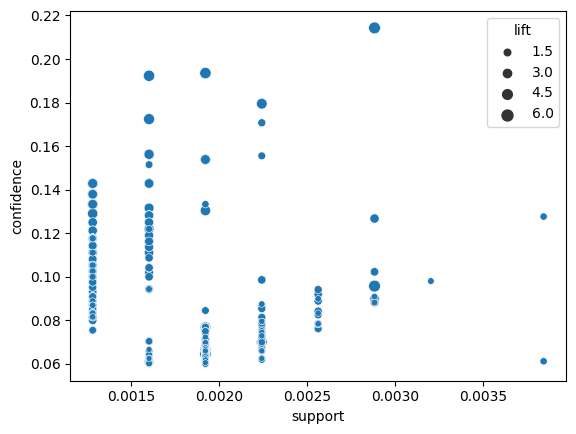

In [55]:
# Generate scatterplot using support and confidence <2D>
sns.scatterplot(x = "support", y = "confidence",
                size = "lift", data = filtered_rules)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


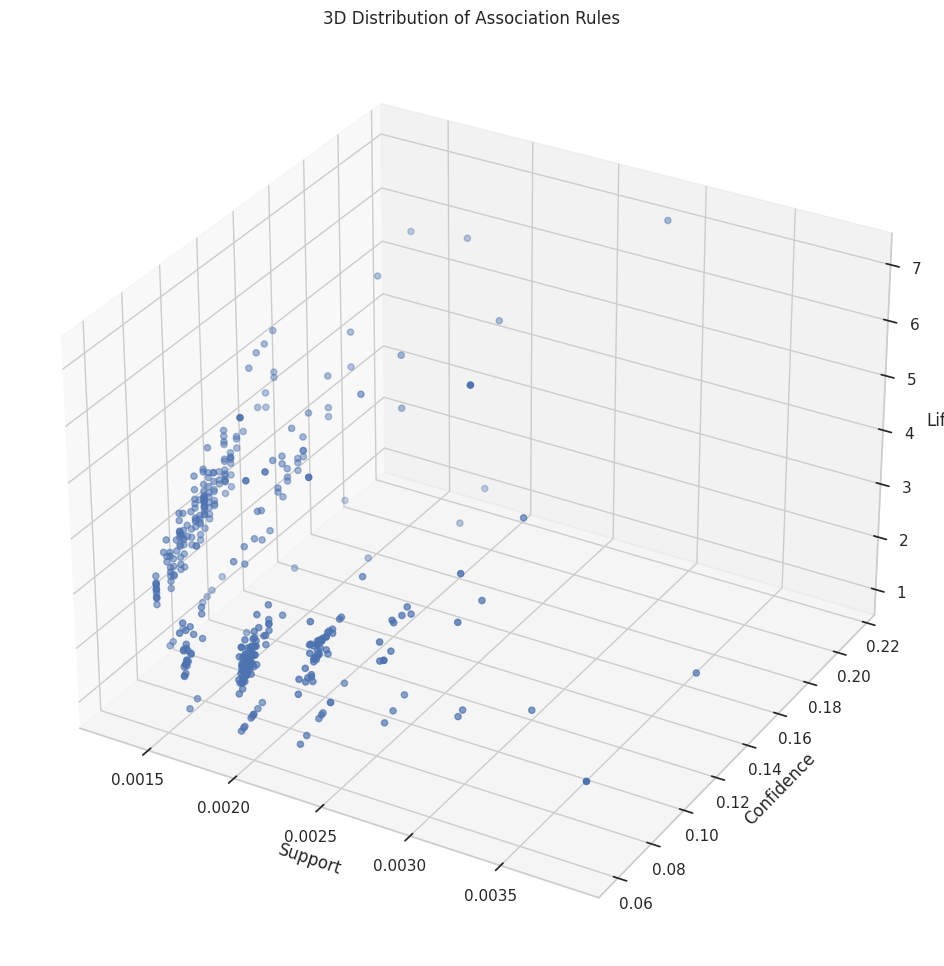

In [56]:
# 3D Plotting
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = filtered_rules['support']
y = filtered_rules['confidence']
z = filtered_rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:25: DeprecationWarning: invalid escape sequence '\d'
<>:25: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-57-fd44d91f1326>:25: DeprecationWarning: invalid escape sequence '\d'
  if re.compile("^[R]\d+$").fullmatch(node)!=None:


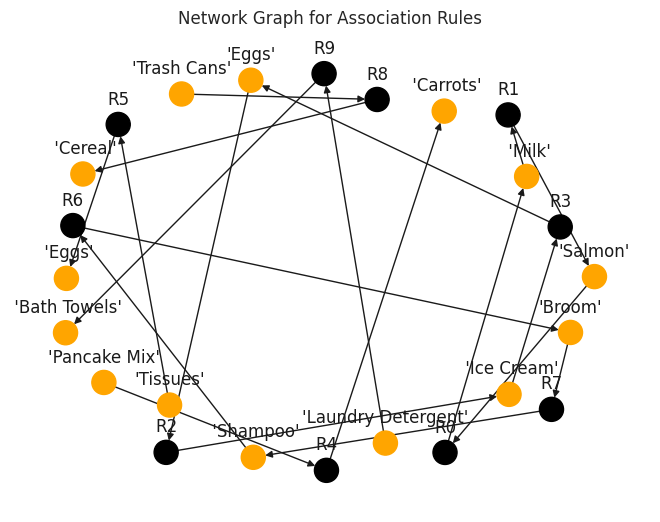

In [57]:
# draw rules
def draw_network(rules, rules_to_show):
    # Directional Graph from Networkx
    network = nx.DiGraph()

    # Loop through number of rules to show
    for i in range(rules_to_show):
        # Add a Rule Node
        network.add_nodes_from(["R" + str(i)])
        for antecedents in rules.iloc[i]['antecedents']:
            # Add antecedent node and link to rule
            network.add_nodes_from([antecedents])
            network.add_edge(antecedents, "R" + str(i), weight = 2)

        for consequents in rules.iloc[i]['consequents']:
            # Add consequent node and link to rule
            network.add_nodes_from([consequents])
            network.add_edge("R" + str(i), consequents, weight = 2)

    color_map = []

    # For every node, if it's a rule, color as Black, otherwise Orange

    for node in network:
        if re.compile("^[R]\d+$").fullmatch(node)!=None:
            color_map.append('black')
        else:
            color_map.append('orange')

    # Position nodes using spring layout
    pos = nx.spring_layout(network, k=16, scale=1)

    # Draw the network graph
    nx.draw(network, pos, node_color = color_map, font_size = 8)

    # Shift the test position upwards
    for p in pos:
        pos[p][1] += 0.12

    nx.draw_networkx_labels(network, pos)
    plt.title("Network Graph for Association Rules")
    plt.show()

draw_network(filtered_rules, 10)